In [1]:
import pandas as pd
import numpy as np
import os
from dotenv import load_dotenv

load_dotenv()
from kdutils.macro2 import *

In [2]:
method = 'aicso4'
g_instruments = 'rbb'
horizon = 1
category = 1
types = 'o2o'

In [3]:
dirs = os.path.join(base_path, method, g_instruments, 'merged')
filename = os.path.join(
        dirs, "{0}_{1}h_{2}_{3}.feather".format(types, horizon, "native", 'adequacy_1'))

In [4]:
total_data1 = pd.read_feather(filename)
total_data1.head()

,trade_time,code,tn001_5_10_1,tn001_10_15_1,tn001_5_10_0,tn001_10_15_0,tn002_5_1,tn002_10_1,tn002_5_0,tn002_10_0,...,rv013_75_10_15_1,rv013_25_5_10_1,rv013_25_10_15_1,rv014_75_5_10_1,rv014_75_10_15_1,rv014_25_5_10_1,rv014_25_10_15_1,rv014_25_5_10_0,rv014_25_10_15_0,nxt1_ret
0,2020-01-02 09:01:00,RB,1.459269,1.705448,1.134386,1.868720,373.237236,370.232301,371.061499,369.058288,...,-0.000147,-0.000176,-0.000071,-8738.303356,-5272.875300,-8742.866846,-5423.672640,-5753.758,-1663.707111,0.000000
1,2020-01-02 09:02:00,RB,1.709210,1.693695,1.198046,1.925018,372.407656,370.326155,371.514711,369.187448,...,-0.000147,-0.000176,-0.000071,-4412.101925,-4007.716335,-4416.398415,-4170.128379,-6674.810,-1295.260444,0.000279
2,2020-01-02 09:03:00,RB,1.913968,1.709833,1.275712,1.976607,371.249602,370.072944,371.571888,369.555548,...,-0.000147,-0.000176,-0.000071,-1582.098821,-2853.830462,-1585.877193,-3018.604690,-7586.298,-1418.240889,0.000000
3,2020-01-02 09:04:00,RB,1.929378,1.731894,1.337522,2.019350,369.680853,369.431200,371.765958,369.505249,...,-0.000147,-0.000176,-0.000071,1897.741643,-778.917688,1894.668939,-941.614080,-6028.398,-935.389778,-0.000557
4,2020-01-02 09:05:00,RB,1.801669,1.743390,1.461727,2.035222,368.575697,368.873779,371.733260,369.514706,...,-0.000147,-0.000176,-0.000071,3843.918763,917.423511,3841.557069,765.128671,-3100.436,-403.295111,-0.001116


In [5]:
columns = [col for col in total_data1.columns if col not in ['trade_time','code','nxt1_ret']]

In [7]:
factor_name = 'rv013_25_10_15_1'#columns[0]
factor_name

'rv013_25_10_15_1'

In [12]:
total_data1['rv013_25_10_15_1'].tail(20)

434675   -0.000025
434676   -0.000025
434677   -0.000025
434678   -0.000025
434679   -0.000025
434680   -0.000025
434681   -0.000025
434682   -0.000025
434683   -0.000025
434684   -0.000025
434685   -0.000025
434686   -0.000025
434687   -0.000025
434688   -0.000025
434689   -0.000025
434690   -0.000025
434691   -0.000025
434692   -0.000025
434693   -0.000025
434694   -0.000025
Name: rv013_25_10_15_1, dtype: float64

In [13]:
### 平稳性检验

#from statsmodels.tsa.stattools import adfuller
#result = adfuller(total_data[factor_name].dropna()) 
#print(f'ADF Statistic: {result[0]}')
#print(f'p-value: {result[1]}') # p-value越小，越倾向于拒绝原假设（数据非平稳）
#if result[1] <= 0.05:  ## 显著性
#    print("数据可能是平稳的 (p <= 0.05)")
#else:
#    print("数据可能不是平稳的 (p > 0.05)")

#if result[0] <= result[4]['5%']:#获取5%显著性水平的临界值
#    print("数据可能是平稳的 (ADF Statistic <= 5% Critical Value)")
#else:
#    print("数据可能不是平稳的 (ADF Statistic > 5% Critical Value)")

In [14]:
### 中位数 均值
### 均值和标准差差异是否大
mean1 = total_data1[factor_name].mean()
median1 = total_data1[factor_name].median()
std1 = total_data1[factor_name].std()
print(f"Mean: {mean1}, Median: {median1}, Std: {std1}")

Mean: -3.076390797744872e-05, Median: -2.3385703575470458e-05, Std: 0.00012094966809683114


<Axes: title={'center': 'Rolling Mean and Median of rv013_25_10_15_1 Feature  (Window=20)'}>

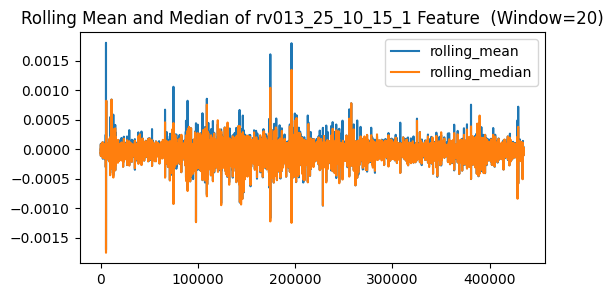

In [16]:
### 滚动均值和滚动标准差
## 在不同时间窗口或数据子集上计算均值/中位数 如果不稳定,剧烈波动可能表明特征不稳定或市场状态发生根本
## 均值与中位数差异大，指示存在偏斜和潜在的异常值影响。需要判断这些极端值是真实信号还是噪声。
## 如果是真实信号但极端：
## 保留： 如果模型需要捕捉这种极端情况，或者你的分析目标就是研究这些极端事件
## 转换数据： 如对数转换，可以减小极端值的影响。
## 使用稳健的统计方法或模型： 对异常值不敏感的方法。
## 分箱/离散化： 将连续特征转换为分类特征，可以将极端值归入一个特定的“极端”类别
## 独建模： 有时可以将正常数据和极端情况分开建模。
## 没有万能药
window = 20
mean1 = total_data1[factor_name].rolling(window).mean()
mean1.name = 'rolling_mean'
median1 = total_data1[factor_name].rolling(window).median()
median1.name = 'rolling_median'
pd.concat([mean1,median1], axis=1).plot(
               figsize=(6, 3), 
               title='Rolling Mean and Median of {0} Feature  (Window=20)'.format(factor_name))

### 标准化差异（相对差异) 

In [42]:
## 提供一个相对的度量,这个比值较大(0.5 经验值)， 表明偏斜较高或存在有影响力的值
window = 20
threshold = 0.5
mean1 = total_data1[factor_name].rolling(window).mean()
median1 = total_data1[factor_name].rolling(window).median()
std1 = total_data1[factor_name].rolling(window).std()
rt = (mean1 - median1) / std1
rt#.dropna()

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
434690   NaN
434691   NaN
434692   NaN
434693   NaN
434694   NaN
Name: rv013_25_10_15_1, Length: 434695, dtype: float64

In [18]:
## (如果中位数非0)。这给出了一个百分比差异
window = 20
mean1 = total_data1['tn001_5_10_1'].rolling(window).mean()
median1 = total_data1['tn001_5_10_1'].rolling(window).median()
((mean1 - median1) / median1)#.mean()

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
            ...   
434690    0.090376
434691    0.080420
434692    0.075577
434693    0.076144
434694    0.069397
Name: tn001_5_10_1, Length: 434695, dtype: float64

#### 置信区间宽度
绝对宽度： 直接告诉你置信区间的范围大小，单位与你的数据相同
相对宽度： (宽度 / |统计量|)，将宽度标准化，使其更具可比性，尤其是在比较不同尺度的数据或不同大小的统计量时。
- 相对宽度为 0.1 (或 10%) 表示置信区间的宽度是均值（或中位数）绝对大小的10%
- 这个相对宽度越小，表示对该统计量的估计越精确（相对于其自身的大小）。如果这个值很大，比如超过50%或100%，通常意味着估计非常不确定，可能样本量不足或数据波动性太大。

In [19]:
from scipy import stats
confidence_level = 0.95
#### 置信区间
mean_val = total_data1[factor_name].mean()
std_err_mean = total_data1[factor_name].sem() # 标准误差

## 需要确保 std_err_mean 大于0 即标准误差有效
mean_ci_lower, mean_ci_upper = stats.t.interval(confidence_level, len(total_data1[factor_name]) - 1, 
                                                loc=mean_val, scale=std_err_mean)
print(f"均值: {mean_val:.4f}")
print(f"均值的 {confidence_level*100:.0f}% 置信区间: [{mean_ci_lower:.4f}, {mean_ci_upper:.4f}]")

mean_ci_width = mean_ci_upper - mean_ci_lower
relative_width_mean = mean_ci_width / abs(mean_val) # 使用绝对值，因为均值可能为负
print(f"均值置信区间的绝对宽度: {mean_ci_width:.4f}")
print(f"均值置信区间的相对宽度 (宽度/|均值|): {relative_width_mean:.4%}")

均值: -0.0000
均值的 95% 置信区间: [-0.0000, -0.0000]
均值置信区间的绝对宽度: 0.0000
均值置信区间的相对宽度 (宽度/|均值|): 2.3375%


In [20]:
#import numpy as np
#median_val = total_data1[factor_name].median()

#res = stats.bootstrap((total_data1[factor_name].values,), np.median, 
#                      confidence_level=confidence_level, method='BCa', random_state=42)
#median_ci_lower = res.confidence_interval.low
#median_ci_upper = res.confidence_interval.high
#median_ci_width = median_ci_upper - median_ci_lower
#relative_width_median_bootstrap = median_ci_width / abs(median_val)
#print(f"中位数置信区间的绝对宽度 (Bootstrap BCa): {median_ci_width:.4f}")
#print(f"中位数置信区间的相对宽度 (宽度/|中位数|, Bootstrap BCa): {relative_width_median_bootstrap:.4%}")

In [22]:
### 与均值比较 CV可以衡量相对波动性， 表明相对于均值而言，标准差很大
### ** 特征几乎没有变化，可能不包含任何预测信息
## 特征可能噪声过大，或者包含极端异常值，需要清洗或
## 指导意见
## 
cv1 = total_data1[factor_name].std()/np.abs(total_data1[factor_name].mean())
if cv1 < 0.1:
    print("Data1 has low relative volatility.")
elif 0.1 <= cv1 < 0.3:
    print("Data1 has moderate relative volatility.")
else:
    print("Data1 has high relative volatility.")

Data1 has high relative volatility.


标准差大的意义:
1. 计算变异系数 (CV): 计算变异系数 (CV) CV可以衡量相对波动性， 表明相对于均值而言，标准差很大。
2. 与特征范围取值比较: 如果标准差接近或超过了特征可能取值范围的一半（对于有界特征），那它可能算很大。
例如，一个0-100的RSI指标，如果标准差是40，就非常大了
3. 经验法则: 对于正态分布，大约68%的数据在 均值 ± 1*标准差 内，95%在 均值 ± 2*标准差 内，99.7%在 均值 ± 3*标准差 内. 均值 ± 2*标准差 或 均值 ± 3*标准差 的范围远远超出了你对该特征合理取值范围的预期，或者覆盖了大部分理论可能范围，那么标准差可能算“大”。

In [23]:
# 均值置信区间的宽度与样本量 (n) 和标准差 (s) 的关系来演示
# 1. 固定样本标准差 s，改变样本量 n，观察置信区间宽度的变化
# 2. 固定样本量 n，改变样本标准差 s，观察置信区间宽度的变化。

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [24]:
def calculate_mean_ci_width(data_sample, confidence_level=0.95):
    n_sample = len(data_sample)
    mean_sample = np.mean(data_sample)
    std_err_sample = stats.sem(data_sample)
    if n_sample <= 1 or std_err_sample == 0:
        return np.nan # Not enough data or no variation

    # 使用t分布
    ci_lower, ci_upper = stats.t.interval(confidence_level, n_sample - 1, loc=mean_sample, scale=std_err_sample)
    return ci_upper - ci_lower

样本量 (n): 10, 平均置信区间宽度: 0.000161
样本量 (n): 30, 平均置信区间宽度: 0.000074
样本量 (n): 50, 平均置信区间宽度: 0.000060
样本量 (n): 100, 平均置信区间宽度: 0.000047
样本量 (n): 200, 平均置信区间宽度: 0.000035
样本量 (n): 500, 平均置信区间宽度: 0.000021
样本量 (n): 1000, 平均置信区间宽度: 0.000015
样本量 (n): 5000, 平均置信区间宽度: 0.000007
样本量 (n): 10000, 平均置信区间宽度: 0.000005
样本量 (n): 50000, 平均置信区间宽度: 0.000002
样本量 (n): 100000, 平均置信区间宽度: 0.000001
样本量 (n): 199999, 平均置信区间宽度: 0.000001


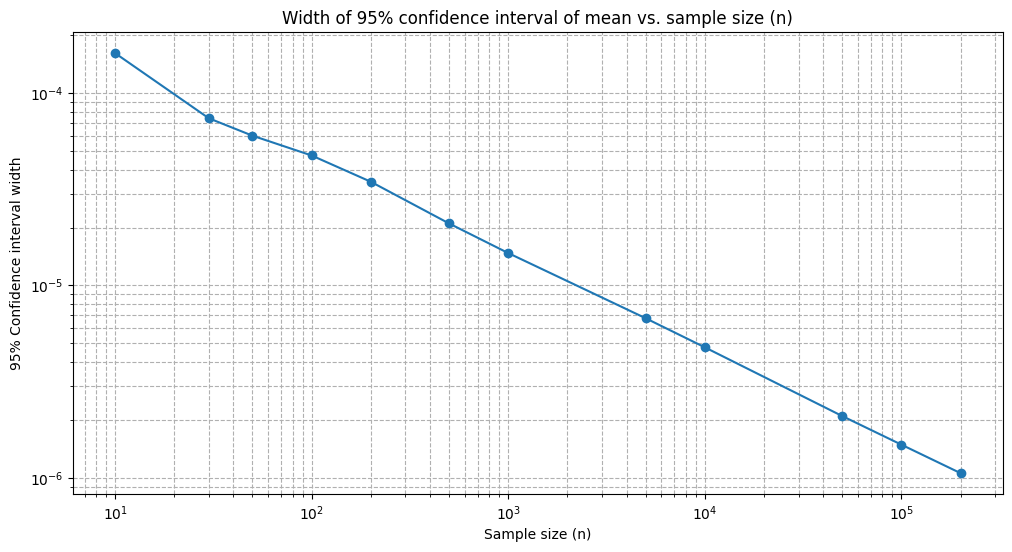

In [25]:
# --- 演示1: 均值置信区间宽度 vs. 样本量 (n) ---
# 我们将从完整数据中抽取不同大小的样本
sample_sizes_to_test = [10, 30, 50, 100, 200, 500, 1000, 5000, 10000, 50000, 100000, 199999] # 最大接近总样本量 定义了一系列我们想要测试的样本大小。
num_trials_per_size = 30 # 对于每个样本大小，对于每一个样本大小 进行多次（例如30次）随机抽样。这是因为单次抽样的结果可能有随机性，取多次试验的平均宽度会更稳定。
confidence_level = 0.95
results_n = []

for n_val in sample_sizes_to_test:
    current_widths = []
    for _ in range(num_trials_per_size):
        #从完整数据中无放回地抽取 n_val 个样本。replace=False 很重要，因为我们是在模拟从一个有限总体中抽取不同大小的样本
        sample = total_data1[factor_name].sample(n=n_val, replace=False, random_state=np.random.randint(100000))
        # 计算抽样样本的均值 (mean_sample) 和均值的标准误 (std_err_sample)。
        mean_sample = sample.mean()
        std_err_sample = stats.sem(sample) # sample.std(ddof=1) / np.sqrt(n_val)

        if n_val <= 1 or std_err_sample == 0:
            current_widths.append(np.nan)
            continue

        ci_lower, ci_upper = stats.t.interval(confidence_level, n_val - 1, loc=mean_sample, scale=std_err_sample) # 计算该样本均值的95%置信区间。
        current_widths.append(ci_upper - ci_lower)
    avg_width = np.nanmean(current_widths) # 使用 nanmean 以防有nan值
    results_n.append({'sample_size': n_val, 'avg_ci_width': avg_width})
    print(f"样本量 (n): {n_val}, 平均置信区间宽度: {avg_width:.6f}")

results_df_n = pd.DataFrame(results_n)

plt.figure(figsize=(12, 6))
plt.plot(results_df_n['sample_size'], results_df_n['avg_ci_width'], marker='o', linestyle='-')
plt.title('Width of 95% confidence interval of mean vs. sample size (n)')
plt.xlabel('Sample size (n)')
plt.ylabel(f'{confidence_level*100:.0f}% Confidence interval width')
plt.xscale('log') # 样本量跨度大，用对数坐标轴更清晰
plt.yscale('log') # 宽度变化也可能跨越数量级
plt.grid(True, which="both", ls="--")
plt.show()

# 随着样本量 (n) 的增加，均值置信区间的平均宽度显著减小
# 曲线的下降趋势在样本量较小时非常陡峭，随着样本量的增加，曲线逐渐变平缓。这符合 1/√n 的关系——样本量增加带来的宽度缩减效应是边际递减的。
# 意义：
#  1. 估计精度的提升： 更大的样本量能让我们对总体均值的估计更加精确。置信区间越窄，我们对真实均值可能落入的范围就越有把握。
#  2. 统计充分性的体现： 如果样本量很小，置信区间会非常宽，这意味着基于这个小样本得出的均值估计非常不可靠，
#  数据可能不具有统计充分性来精确估计均值。随着样本量增加到一定程度，置信区间宽度会收敛到一个相对较小且稳定的水平（尽管永远不会为零），
#  这时我们可以说数据对于估计均值具有了更好的统计充分性。
#  3. 决策的依据： 如果你需要基于均值做出重要决策，一个窄的置信区间能提供更大的信心。
# 例如，如果一个策略日收益率的95%置信区间是 [0.1%, 0.15%]，你更有信心它是盈利的；但如果是 [-0.5%, 0.75%]，则不确定性大得多 
#  4. 与理论曲线的对比： 你会发现通过子采样得到的平均宽度曲线与基于全样本标准差计算的理论宽度曲线非常接近（尤其当样本量较大时）。
#  这验证了统计理论的正确性，并说明了我们的子采样实验是有效的。


我们数据的标准差 (s) 约为: 0.0001

对于样本量 n=1000:
原始特征 ('rv013_25_10_15_1'):
  样本标准差 (s): 0.0001
  均值置信区间宽度: 0.000015

模拟低标准差特征 (目标 s ≈ 0.00):
  样本标准差 (s): 0.0001
  均值置信区间宽度: 0.000007

模拟高标准差特征 (目标 s ≈ 0.00):
  样本标准差 (s): 0.0002
  均值置信区间宽度: 0.000030


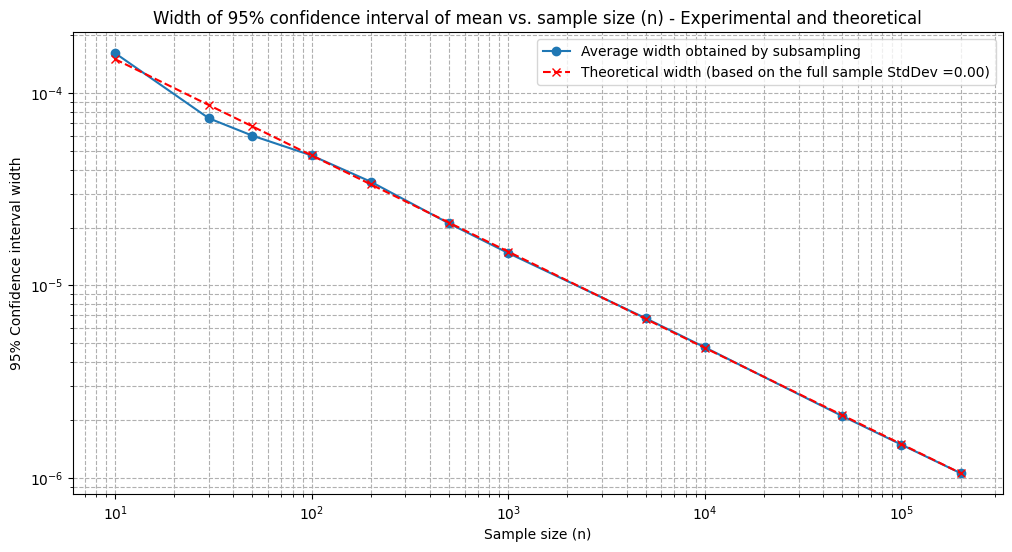

In [26]:
# --- 演示2: 标准差 (s) 对置信区间宽度的影响 (理论层面和间接观察) ---
# 对于固定的20万行数据，其“真实”标准差是相对固定的。
# 我们无法直接改变这份数据的标准差来进行实验。
# 但我们可以做以下几点来理解标准差的影响：

full_data_std = total_data1[factor_name].std()
print(f"我们数据的标准差 (s) 约为: {full_data_std:.4f}")
np.random.seed(123)
another_feature_data_low_std = total_data1[factor_name].mean() + np.random.normal(0, full_data_std / 2, len(total_data1[factor_name])) # 标准差减半
another_feature_data_high_std = total_data1[factor_name].mean() + np.random.normal(0, full_data_std * 2, len(total_data1[factor_name])) # 标准差加倍
fixed_n_for_std_comparison = 1000 # 选择一个固定的样本量进行比较

#  原始数据的一个子样本
sample_original = total_data1[factor_name].sample(n=fixed_n_for_std_comparison, random_state=1)
width_original = stats.t.interval(confidence_level, len(sample_original)-1, loc=sample_original.mean(), scale=stats.sem(sample_original))[1] - \
                 stats.t.interval(confidence_level, len(sample_original)-1, loc=sample_original.mean(), scale=stats.sem(sample_original))[0]
std_original = sample_original.std()
print(f"\n对于样本量 n={fixed_n_for_std_comparison}:")
print(f"原始特征 ('{total_data1[factor_name].name}'):")
print(f"  样本标准差 (s): {std_original:.4f}")
print(f"  均值置信区间宽度: {width_original:.6f}")

# 标准差减半的模拟特征
sample_low_std = pd.Series(another_feature_data_low_std).sample(n=fixed_n_for_std_comparison, random_state=2)
width_low_std = stats.t.interval(confidence_level, len(sample_low_std)-1, loc=sample_low_std.mean(), scale=stats.sem(sample_low_std))[1] - \
                stats.t.interval(confidence_level, len(sample_low_std)-1, loc=sample_low_std.mean(), scale=stats.sem(sample_low_std))[0]
std_low = sample_low_std.std()
print(f"\n模拟低标准差特征 (目标 s ≈ {full_data_std/2:.2f}):")
print(f"  样本标准差 (s): {std_low:.4f}")
print(f"  均值置信区间宽度: {width_low_std:.6f}")


# 标准差加倍的模拟特征
sample_high_std = pd.Series(another_feature_data_high_std).sample(n=fixed_n_for_std_comparison, random_state=3)
width_high_std = stats.t.interval(confidence_level, len(sample_high_std)-1, loc=sample_high_std.mean(), scale=stats.sem(sample_high_std))[1] - \
                 stats.t.interval(confidence_level, len(sample_high_std)-1, loc=sample_high_std.mean(), scale=stats.sem(sample_high_std))[0]
std_high = sample_high_std.std()
print(f"\n模拟高标准差特征 (目标 s ≈ {full_data_std*2:.2f}):")
print(f"  样本标准差 (s): {std_high:.4f}")
print(f"  均值置信区间宽度: {width_high_std:.6f}")

# 4. 可以画出理论曲线 (假设标准差固定为全样本标准差)
n_values_theory = np.array(results_df_n['sample_size'])
# 对于大n，t_crit 约等于 z_crit
z_crit = stats.norm.ppf((1 + confidence_level) / 2) # Z值 for a two-sided CI approx 1.96 for 95%
theoretical_widths = 2 * z_crit * (full_data_std / np.sqrt(n_values_theory))

plt.figure(figsize=(12, 6))
plt.plot(results_df_n['sample_size'], results_df_n['avg_ci_width'], marker='o', linestyle='-', label='Average width obtained by subsampling')
plt.plot(n_values_theory, theoretical_widths, marker='x', linestyle='--', color='red', label=f'Theoretical width (based on the full sample StdDev ={full_data_std:.2f})')
plt.title('Width of 95% confidence interval of mean vs. sample size (n) - Experimental and theoretical')
plt.xlabel('Sample size (n)')
plt.ylabel(f'{confidence_level*100:.0f}% Confidence interval width')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

# 核心发现（通过间接比较和理论）： 在相同的样本量下，数据的标准差 (s) 越大，均值置信区间的宽度也越大。
# 间接演示的观察： 当我们比较原始特征、模拟的低标准差特征和模拟的高标准差特征（在相同样本量下）的置信区间宽度时，你会看到：
# 标准差最小的特征，其置信区间宽度也最小。
# 标准差最大的特征，其置信区间宽度也最大。
# 意义：
# 数据波动性的影响： 标准差衡量了数据本身的离散程度或波动性。数据越分散（标准差越大），即使样本量相同，我们对总体均值位置的把握也越小，因此置信区间会更宽。
# 对所需样本量的启示： 如果你的特征数据本身波动性很大（标准差大），那么为了达到与低波动性数据相同的估计精度（即相同的置信区间宽度），
# 你就需要收集或使用更大的样本量。这就是为什么前面提到“高标准差通常意味着需要更大的样本量”。
# 特征选择的考量： 在构建模型时，如果两个特征都能提供相似的预测信息，但一个特征的标准差远小于另一个，那么基于前者得到的参数估计可能会更稳定（置信区间更窄）。
# 风险评估： 对于收益率这类数据，高标准差直接意味着高风险。其均值的置信区间也会相应变宽，反映了对未来平均收益预测的不确定性增加。

In [27]:
# 演示1 对于同一份数据（标准差 s 固定），样本量 n 越大，置信区间宽度 W 越小（估计越精确）。
# 演示2 对于相同的样本量 n，数据的标准差 s 越大，置信区间宽度 W 越大（估计越不精确）。

In [28]:
from scipy.stats import skew
# --- 1. 偏度计算与评估函数 ---
def evaluate_skewness(data_series, feature_name="Feature"):
    """
    计算数据序列的偏度，并根据经验法则进行评估。
    """
    s = skew(data_series.dropna()) # dropna以防有缺失值影响计算

    print(f"\n--- {feature_name} 偏度分析 ---")
    print(f"偏度 (Skewness): {s:.4f}")

    abs_s = abs(s)
    if abs_s < 0.5:
        interpretation = "分布近似对称 (Approx. Symmetrical)"
    elif 0.5 <= abs_s < 1:
        interpretation = "分布中等程度偏斜 (Moderately Skewed)"
    else: # abs_s >= 1
        interpretation = "分布高度偏斜 (Highly Skewed)"

    if s > 0.05: # 加一个小阈值避免非常接近0的也被判为正偏
        direction = "正偏/右偏 (Right-skewed)"
    elif s < -0.05:
        direction = "负偏/左偏 (Left-skewed)"
    else:
        direction = "接近对称 (Nearly Symmetrical)"

    print(f"评估: {interpretation}")
    if interpretation != "分布近似对称 (Approx. Symmetrical)":
        print(f"偏斜方向: {direction}")

    # 提醒潜在的模型影响
    if abs_s >= 1:
        print("提醒: 高度偏斜可能影响某些依赖数据对称性的模型 (如线性回归的OLS假设)。")
    elif 0.5 <= abs_s < 1:
        print("提醒: 中等偏斜，根据模型需求，可能需要考虑数据转换。")

    return s, interpretation, direction

evaluate_skewness(total_data1['tn001_5_10_1'], feature_name="tn001_5_10_1")


--- tn001_5_10_1 偏度分析 ---
偏度 (Skewness): 96.2387
评估: 分布高度偏斜 (Highly Skewed)
偏斜方向: 正偏/右偏 (Right-skewed)
提醒: 高度偏斜可能影响某些依赖数据对称性的模型 (如线性回归的OLS假设)。


(96.23867295791385, '分布高度偏斜 (Highly Skewed)', '正偏/右偏 (Right-skewed)')


--- 原始的右偏数据 偏度分析 ---
偏度 (Skewness): 4.6952
评估: 分布高度偏斜 (Highly Skewed)
偏斜方向: 正偏/右偏 (Right-skewed)
提醒: 高度偏斜可能影响某些依赖数据对称性的模型 (如线性回归的OLS假设)。

--- 对数转换后的数据 偏度分析 ---
偏度 (Skewness): 1.4451
评估: 分布高度偏斜 (Highly Skewed)
偏斜方向: 正偏/右偏 (Right-skewed)
提醒: 高度偏斜可能影响某些依赖数据对称性的模型 (如线性回归的OLS假设)。


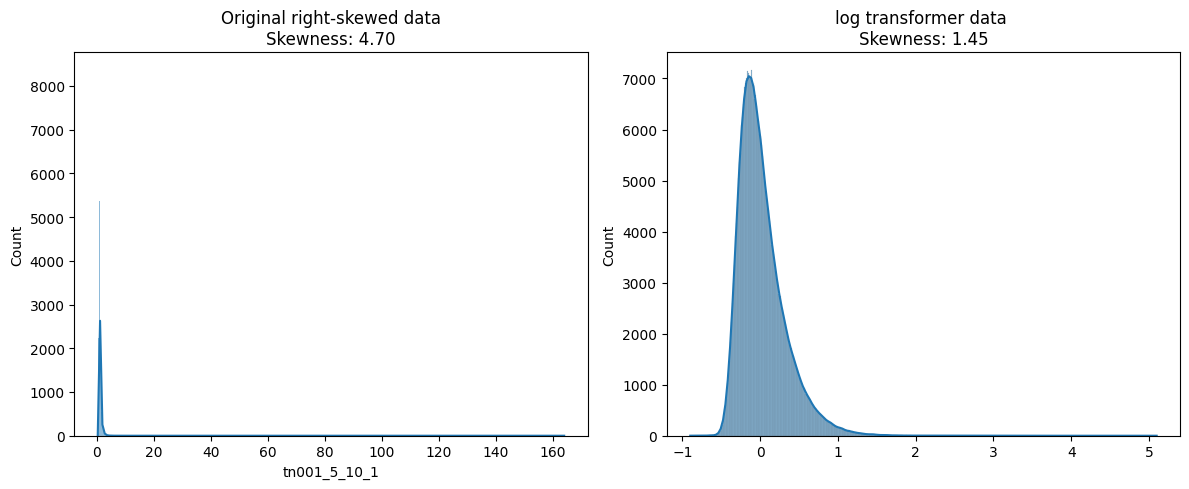

In [29]:
#  处理偏斜数据 (以右偏数据为例)
# # 需要确保数据中没有0或负值，如果有可能，先加一个很小的正常数
# (total_data1['tn001_5_10_1'] > 0).all()
import seaborn as sns

s_right, _, _ = evaluate_skewness(total_data1[factor_name] , "原始的右偏数据")
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(total_data1['tn001_5_10_1'], kde=True, ax=axes[0])
axes[0].set_title(f'Original right-skewed data\nSkewness: {s_right:.2f}')
data_log_transformed = pd.Series(np.log(total_data1['tn001_5_10_1'].values),index=total_data1['tn001_5_10_1'].index)
s_log, _, _ = evaluate_skewness(data_log_transformed, "对数转换后的数据")
sns.histplot(data_log_transformed, kde=True, ax=axes[1])
axes[1].set_title(f'log transformer data \nSkewness: {s_log:.2f}')
plt.tight_layout()
plt.show()

In [30]:
# (b) Box-Cox 转换 - 更通用的幂转换，要求数据为正
# Box-Cox会自动寻找最佳的lambda参数来使数据尽可能接近正态分布
from scipy.stats import skew, boxcox

data_boxcox_transformed, best_lambda = boxcox(total_data1[factor_name]) # boxcox返回转换后数据和lambda值
data_boxcox_transformed = pd.Series(data_boxcox_transformed, name="BoxCox_Transformed_Right_Skewed")
s_boxcox, _, _ = evaluate_skewness(data_boxcox_transformed, "Right-skewed data after Box-Cox transformation")
print(f"Box-Cox 找到的最佳 lambda: {best_lambda:.4f}")
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(total_data1[factor_name], kde=True, ax=axes[0])
axes[0].set_title(f'Original right-skewed data\nSkewness: {s_right:.2f}')
sns.histplot(data_boxcox_transformed, kde=True, ax=axes[1])
axes[1].set_title(f'Box-Cox transformed data\nSkewness: {s_boxcox:.2f}')
plt.tight_layout()
plt.show()

ValueError: Data must be positive.

In [65]:
## 左偏数据处理
## # 1. 反射数据
# 加一个小的epsilon防止C-x恰好为0 (如果原始数据有重复最大值)或后续处理需要严格正数
#epsilon = 1e-6
#constant_C = data_left_skewed.max() + epsilon
#reflected_data = constant_C - data_left_skewed

## 现在 reflected_data 应该是右偏的 (或至少偏度比原来小)
#print(f"原始左偏数据偏度: {skew(data_left_skewed.dropna()):.4f}")
#print(f"反射后数据偏度: {skew(reflected_data.dropna()):.4f}")


In [31]:
import pandas as pd
import numpy as np
from scipy.stats import kurtosis, boxcox # boxcox 用于演示转换，尽管对峰度效果有限
from scipy.stats.mstats import winsorize
import matplotlib.pyplot as plt
import seaborn as sns
# --- 1. 超额峰度计算与评估函数 (与之前相同) ---
def evaluate_excess_kurtosis(data_series, feature_name="Feature"):
    """
    计算数据序列的超额峰度，并根据经验法则进行评估。
    """
    ek = kurtosis(data_series.dropna(), fisher=True, bias=True)
    print(f"\n--- {feature_name} 超额峰度分析 ---")
    print(f"超额峰度 (Excess Kurtosis): {ek:.4f}")

    abs_ek = abs(ek)
    if abs_ek < 1:
        interpretation = "尾部行为与正态分布无显著差异 (Mesokurtic-like)"
    elif ek > 0 and 1 <= ek < 3:
        interpretation = "中等程度尖峰/厚尾 (Moderately Leptokurtic)"
    elif ek > 0 and ek >= 3:
        interpretation = "高度尖峰/厚尾 (Highly Leptokurtic / Fat-tailed)"
    elif ek < 0 and -3 < ek <= -1: # 注意这里阈值与之前略有调整，使其更连续
        interpretation = "中等程度平顶/薄尾 (Moderately Platykurtic)"
    elif ek < 0 and ek <= -3:
        interpretation = "高度平顶/薄尾 (Highly Platykurtic)"
    else: # 比如 ek 在 -1 到 0 之间
        interpretation = "轻微平顶/薄尾或接近正态 (Slightly Platykurtic or near Mesokurtic)"

    print(f"评估: {interpretation}")

    if ek > 1:
        print("提醒: 厚尾意味着极端值出现的概率高于正态分布预期。这对风险管理和某些依赖正态性假设的模型很重要。")
    elif ek < -0.5: # 例如，比-0.5更负
        print("提醒: 薄尾意味着极端值出现的概率低于正态分布预期。数据可能比正态分布更均匀或有界。")
    return ek, interpretation

In [32]:
# --- 2. 分析你的特征数据 ---
print(f"开始分析特征: {total_data1[factor_name].name}")
print(f"数据量: {len(total_data1[factor_name])}")
print(f"均值: {total_data1[factor_name].mean():.4f}, 标准差: {total_data1[factor_name].std():.4f}")
print(f"偏度: {total_data1[factor_name].skew():.4f}") # 同时看一下偏度


开始分析特征: rv013_25_10_15_1
数据量: 434695
均值: -0.0000, 标准差: 0.0001
偏度: 4.6953


In [33]:
ek_original, interpretation_original = evaluate_excess_kurtosis(total_data1[factor_name], 
                                                                total_data1[factor_name].name)


--- rv013_25_10_15_1 超额峰度分析 ---
超额峰度 (Excess Kurtosis): 205.6364
评估: 高度尖峰/厚尾 (Highly Leptokurtic / Fat-tailed)
提醒: 厚尾意味着极端值出现的概率高于正态分布预期。这对风险管理和某些依赖正态性假设的模型很重要。


/workspace/worker/env/chaos/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 39640 (\N{CJK UNIFIED IDEOGRAPH-9AD8}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/workspace/worker/env/chaos/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/workspace/worker/env/chaos/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 23574 (\N{CJK UNIFIED IDEOGRAPH-5C16}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/workspace/worker/env/chaos/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 23792 (\N{CJK UNIFIED IDEOGRAPH-5CF0}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/workspace/worker/env/chaos/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 21402

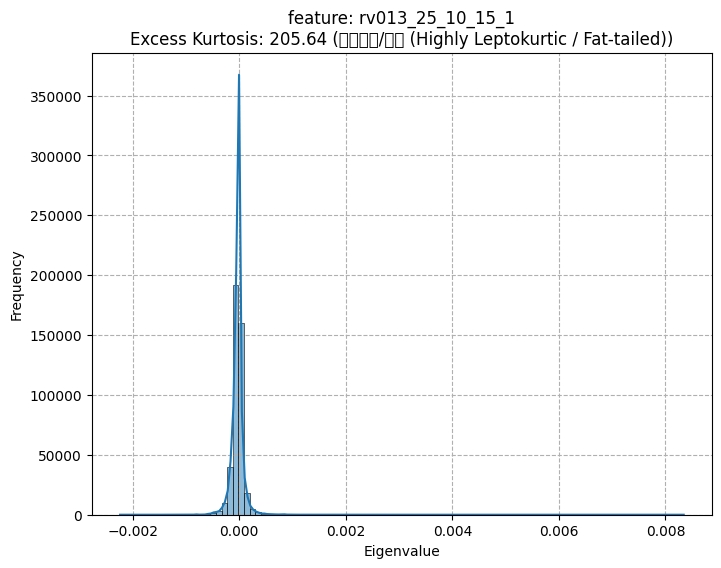

In [34]:
plt.figure(figsize=(8, 6))
sns.histplot(total_data1[factor_name], kde=True, bins=100) # 增加bins数量以更好观察20万数据的分布
plt.title(f"feature: {factor_name}\nExcess Kurtosis: {ek_original:.2f} ({interpretation_original})")
plt.xlabel("Eigenvalue")
plt.ylabel("Frequency")
plt.grid(True, which="both", ls="--")
plt.show()


--- 尝试处理峰度 ---

--- rv013_25_10_15_1_Winsorized_1% 超额峰度分析 ---
超额峰度 (Excess Kurtosis): 3.0495
评估: 高度尖峰/厚尾 (Highly Leptokurtic / Fat-tailed)
提醒: 厚尾意味着极端值出现的概率高于正态分布预期。这对风险管理和某些依赖正态性假设的模型很重要。


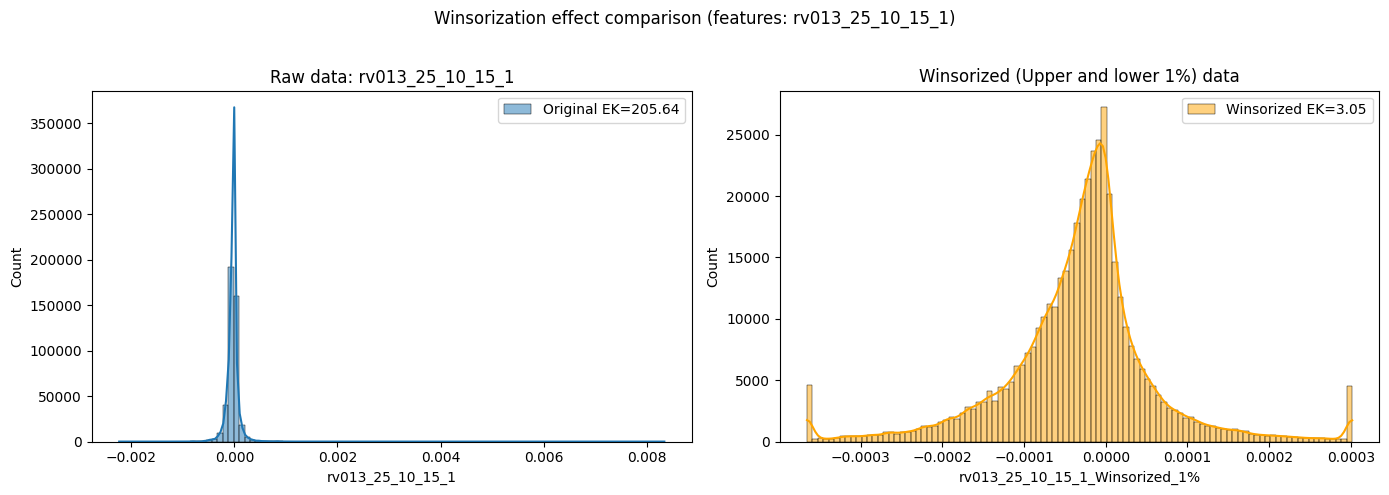


--- rv013_25_10_15_1_Winsorized_5% 超额峰度分析 ---
超额峰度 (Excess Kurtosis): 0.0186
评估: 尾部行为与正态分布无显著差异 (Mesokurtic-like)


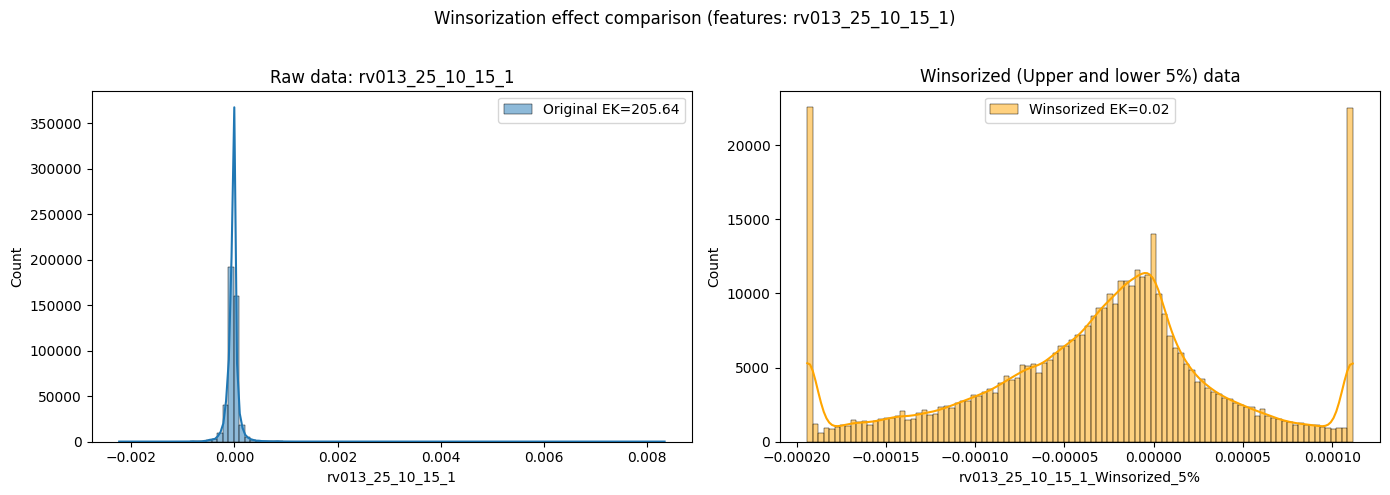


Winsorization的注意事项:
 - Winsorization通过修改极端值来直接影响尾部，从而改变峰度。
 - 选择合适的limits非常关键，过于激进的winsorization会丢失过多信息。
 - 如果数据的厚尾特性是真实的、需要被模型捕捉的（如金融风险），则不应随意winsorize。


In [35]:
print("\n--- 尝试处理峰度 ---")
limits_options = [0.01, 0.05]
name = total_data1[factor_name].name
for limit in limits_options:
    feature_name_winsorized = f"{name}_Winsorized_{limit*100:.0f}%"
    data_winsorized = pd.Series(
        winsorize(total_data1[factor_name].dropna(), limits=[limit, limit]),
        name=feature_name_winsorized
    )
    ek_winsorized, interpretation_winsorized = evaluate_excess_kurtosis(data_winsorized, feature_name_winsorized)

    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    sns.histplot(total_data1[factor_name], kde=True, ax=axes[0], bins=100, label=f'Original EK={ek_original:.2f}')
    axes[0].set_title(f'Raw data: {name}')
    axes[0].legend()

    sns.histplot(data_winsorized, kde=True, ax=axes[1], bins=100, label=f'Winsorized EK={ek_winsorized:.2f}', color='orange')
    axes[1].set_title(f'Winsorized (Upper and lower {limit*100:.0f}%) data')
    axes[1].legend()
    plt.suptitle(f"Winsorization effect comparison (features: {name})")
    plt.tight_layout(rect=[0, 0, 1, 0.96]) # 调整布局以适应suptitle
    plt.show()

print("\nWinsorization的注意事项:")
print(" - Winsorization通过修改极端值来直接影响尾部，从而改变峰度。")
print(" - 选择合适的limits非常关键，过于激进的winsorization会丢失过多信息。")
print(" - 如果数据的厚尾特性是真实的、需要被模型捕捉的（如金融风险），则不应随意winsorize。")

In [36]:
# (b) 数据转换 (如Box-Cox，演示其对峰度的间接影响)
# Box-Cox主要用于处理偏度，但有时也会间接影响峰度。
# 要求数据为正。
name = total_data1[factor_name].name
data_for_boxcox = total_data1[factor_name].dropna()
if (data_for_boxcox > 0).all():
    print("\n尝试Box-Cox转换 (主要影响偏度，可能间接影响峰度)...")
    try:
        data_boxcox_transformed, best_lambda_bc = boxcox(data_for_boxcox)
        data_boxcox_transformed_series = pd.Series(data_boxcox_transformed, name=f"{name}_BoxCox")
        ek_boxcox, interpretation_boxcox = evaluate_excess_kurtosis(data_boxcox_transformed_series, data_boxcox_transformed_series.name)
        print(f"  Box-Cox找到的最佳lambda: {best_lambda_bc:.4f}")
        print(f"  转换前偏度: {data_for_boxcox.skew():.4f}, 转换后偏度: {data_boxcox_transformed_series.skew():.4f}")

        fig, axes = plt.subplots(1, 2, figsize=(14, 5))
        sns.histplot(total_data1[factor_name], kde=True, ax=axes[0], bins=100, label=f'原始 EK={ek_original:.2f}')
        axes[0].set_title(f'Raw data: {name}')
        axes[0].legend()

        sns.histplot(data_boxcox_transformed_series, kde=True, ax=axes[1], bins=100, label=f'Box-Cox EK={ek_boxcox:.2f}', color='green')
        axes[1].set_title(f'Box-Cox Converted data')
        axes[1].legend()
        plt.suptitle(f"Box-Cox Conversion effect comparison (features: {name})")
        plt.tight_layout(rect=[0, 0, 1, 0.96])
        plt.show()

    except ValueError as e:
        print(f"  进行Box-Cox转换失败: {e}. 数据可能仍包含非正值或有其他问题。")
elif not data_for_boxcox.empty:
    print("\n数据包含0或负值，无法直接进行Box-Cox转换。可考虑Yeo-Johnson转换或数据平移。")
else:
    print("\n数据为空，无法进行Box-Cox转换。")


数据包含0或负值，无法直接进行Box-Cox转换。可考虑Yeo-Johnson转换或数据平移。


In [37]:
# --- 5. 业务含义与统计充分性思考 (针对你的数据) ---
print(f"\n--- 关于特征 '{name}' 的业务含义与统计充分性思考 ---")
if ek_original > 1: # 如果是厚尾
    print(f"该特征呈现 {interpretation_original.lower()} (超额峰度={ek_original:.2f}).")
    print("这可能意味着：")
    print("  - 该特征的值偶尔会出现远超其平均波动范围的极端大值或小值。")
    print("  - 如果此特征代表某种风险指标或收益率，那么“黑天鹅”事件（极端事件）的发生概率比正态分布预期的要高。")
    print("  - 如果用于建模，依赖数据正态性假设的模型（如某些线性模型检验、基于正态的VaR）可能不准确。")
    print("\n统计充分性方面：")
    print("  - 20万行数据通常被认为是大样本，有助于更稳定地估计分布的中心（如均值）。")
    print("  - 然而，对于具有显著厚尾的分布，即使有20万行数据，是否已“充分”捕捉到所有相关的极端尾部行为仍需谨慎评估。")
    print("  - 关键在于这些数据是否覆盖了足够多样化的情景，特别是那些可能触发极端值的罕见情景。")
    print("  - 如果历史数据中极端事件发生频率较低，那么20万个数据点中可能只包含少数几个这样的事件，对这些事件的统计特性（如平均大小、发生概率）的估计仍可能有较大不确定性。")
    print("  - 考虑是否有未观察到的、可能导致更极端值的潜在因素。")
    print("  - 建议进行稳健性检查，例如通过自助法(bootstrap)估计参数的置信区间，或将数据划分为不同时间段进行分析，看峰度等统计量是否稳定。")
elif ek_original < -0.5: # 如果是薄尾
    print(f"该特征呈现 {interpretation_original.lower()} (超额峰度={ek_original:.2f}).")
    print("这可能意味着：")
    print("  - 该特征的值相对更集中，出现极端值的概率较低，分布可能比正态分布更“平坦”或“有界”。")
    print("  - 例如，如果这是一个在特定范围内波动的指标（如0-100的震荡指标），其分布可能是薄尾的。")
    print("\n统计充分性方面：")
    print("  - 20万行数据对于估计薄尾分布的特性通常是足够的。")
    print("  - 薄尾意味着不太需要担心未被观察到的极端事件会对整体分布产生颠覆性影响（与厚尾相反）。")
else: # 接近正态峰
    print(f"该特征的尾部行为 ({interpretation_original.lower()}, 超额峰度={ek_original:.2f}) 与正态分布无显著差异或差异较小。")
    print("这通常对许多统计模型是有利的。")
    print("\n统计充分性方面：")
    print("  - 20万行数据对于估计这种接近正态峰的分布特性是相当充分的。")


--- 关于特征 'rv013_25_10_15_1' 的业务含义与统计充分性思考 ---
该特征呈现 高度尖峰/厚尾 (highly leptokurtic / fat-tailed) (超额峰度=205.64).
这可能意味着：
  - 该特征的值偶尔会出现远超其平均波动范围的极端大值或小值。
  - 如果此特征代表某种风险指标或收益率，那么“黑天鹅”事件（极端事件）的发生概率比正态分布预期的要高。
  - 如果用于建模，依赖数据正态性假设的模型（如某些线性模型检验、基于正态的VaR）可能不准确。

统计充分性方面：
  - 20万行数据通常被认为是大样本，有助于更稳定地估计分布的中心（如均值）。
  - 然而，对于具有显著厚尾的分布，即使有20万行数据，是否已“充分”捕捉到所有相关的极端尾部行为仍需谨慎评估。
  - 关键在于这些数据是否覆盖了足够多样化的情景，特别是那些可能触发极端值的罕见情景。
  - 如果历史数据中极端事件发生频率较低，那么20万个数据点中可能只包含少数几个这样的事件，对这些事件的统计特性（如平均大小、发生概率）的估计仍可能有较大不确定性。
  - 考虑是否有未观察到的、可能导致更极端值的潜在因素。
  - 建议进行稳健性检查，例如通过自助法(bootstrap)估计参数的置信区间，或将数据划分为不同时间段进行分析，看峰度等统计量是否稳定。
